# Assignment

In [331]:
import os
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

Problem 1. 

1. Load the moons dataset: from sklearn.datasets import make_moons
- Create 200 samples with noise=0.1
- Split into training (70%) and testing (30%) sets


2. Train two classifiers:
- LogisticRegression
- DecisionTreeClassifier

3. Calculate accuracy for both models on the test set
- Plot the decision boundaries for both classifiers


* Bonus

Implement one technique to improve the performance of either model

In [332]:
from sklearn.datasets import make_moons
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

In [333]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

In [334]:
X

array([[-1.04942573e+00,  8.44426315e-02],
       [ 9.22817545e-01,  4.57488507e-01],
       [ 6.56786593e-01,  6.99596694e-01],
       [ 1.18894020e+00, -3.86528073e-01],
       [ 2.89264549e-01, -1.37744892e-01],
       [ 2.51685082e-01,  1.81006054e-01],
       [-6.68120991e-01,  8.22265447e-01],
       [ 1.55626644e+00, -2.03445580e-01],
       [ 1.87213538e+00, -1.25335230e-01],
       [ 1.43229273e-01,  9.53267512e-01],
       [-4.35091327e-01,  7.43738050e-01],
       [ 1.91161702e+00, -1.05146485e-01],
       [ 1.53432590e+00, -3.97547101e-01],
       [-8.24879535e-01,  5.29607749e-01],
       [ 1.88043395e+00,  1.54681644e-01],
       [ 1.87043050e+00, -9.01427936e-02],
       [-6.84180156e-02,  1.23271872e+00],
       [ 1.04680086e+00, -5.17441448e-01],
       [-1.00198756e+00,  6.32750117e-01],
       [-4.23980382e-01,  7.45855239e-01],
       [ 3.38030046e-01, -6.83719318e-02],
       [ 8.96478204e-01,  5.70936879e-01],
       [ 9.69901385e-01, -6.20552828e-01],
       [-8.

In [335]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [336]:
len(X)

200

Split into training (70%) and testing (30%) datasets

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create a function to illustrate the metrics of the model, which will also output the confusion matrix

In [338]:
def display_metrics(model, X_test, y_test, title):
    fig, ax = plt.subplots(figsize=(6,4))
    y_pred = model.predict(X_test)
    cm_list = confusion_matrix(y_test, y_pred)
    cm_plot = sns.heatmap(cm_list, annot=True, cmap="viridis", fmt="g", ax=ax)
    cm_plot.set_xlabel("Actual values")
    cm_plot.set_ylabel("Predicted values")
    cm_plot.set_title(title)
    plt.show()
    report = classification_report(y_test, y_pred)
    print(report)

Create and train our DecisionTreeClassifier model

In [339]:
model_dtc = DecisionTreeClassifier(random_state=0)

In [340]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [341]:
y_pred1 = model_dtc.predict(X_test)
y_pred1

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [342]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [343]:
accuracy = model_dtc.score(X_test, y_test)
print(f"Accuracy of the model = {accuracy}")

Accuracy of the model = 0.9833333333333333


In [344]:
mean_absolute_error(y_test, y_pred1)

0.016666666666666666

In [345]:
mean_squared_error(y_test, y_pred1)

0.016666666666666666

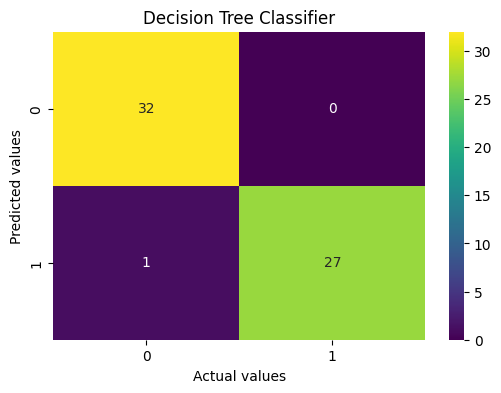

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [346]:
display_metrics(model_dtc, X_test, y_test, title="Decision Tree Classifier")

Create Logistic Regression model

In [347]:
model_lr = LogisticRegression()

In [348]:
scaler = MinMaxScaler()

Normalize our data using MinMaxScaler

In [349]:
X_train_normalized, X_test_normalized = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [350]:
X_train_normalized

array([[0.25197349, 0.88148083],
       [0.64284125, 0.50380342],
       [0.63634083, 0.67569825],
       [0.81385047, 0.1293311 ],
       [0.34161096, 0.54639855],
       [0.52279878, 0.8009887 ],
       [0.45570503, 0.81825025],
       [0.10813348, 0.7040179 ],
       [0.58671621, 0.73434676],
       [0.65521812, 0.41599974],
       [0.86579186, 0.22878777],
       [0.61858965, 0.        ],
       [0.77748019, 0.1825306 ],
       [0.97725392, 0.68585082],
       [0.73210601, 0.07618139],
       [0.61925763, 0.16277011],
       [0.08593264, 0.67053668],
       [0.50098957, 0.16334549],
       [0.63716581, 0.3842497 ],
       [0.68388603, 0.32199965],
       [0.5415862 , 0.73361844],
       [0.54261137, 0.07754644],
       [0.55379032, 0.75332252],
       [0.45061739, 0.41177424],
       [0.89895331, 0.67552841],
       [0.07130204, 0.57904053],
       [0.4977315 , 0.13404765],
       [0.5064443 , 0.1709633 ],
       [0.44749511, 0.21107995],
       [0.07048007, 0.42887272],
       [0.

In [351]:
model_lr.fit(X_train_normalized, y_train)

LogisticRegression()

In [352]:
y_pred2 = model_lr.predict(X_test_normalized)
y_pred2

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [353]:
accuracy = model_lr.score(X_test_normalized, y_test)
print(f"Accuracy of the model = {accuracy}")

Accuracy of the model = 0.8833333333333333


In [354]:
mean_squared_error(y_test, y_pred2)

0.11666666666666667

In [355]:
mean_absolute_error(y_test, y_pred2)

0.11666666666666667

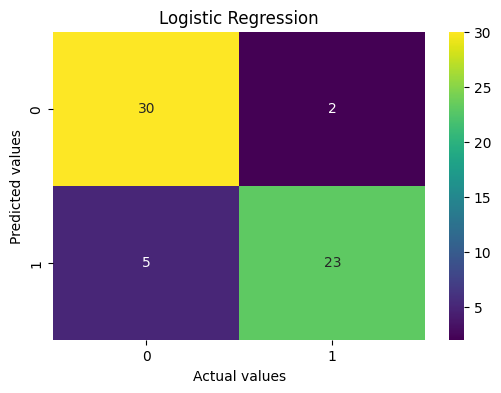

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.92      0.82      0.87        28

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [356]:
display_metrics(model_lr, X_test_normalized, y_test, title="Logistic Regression")

In [357]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)

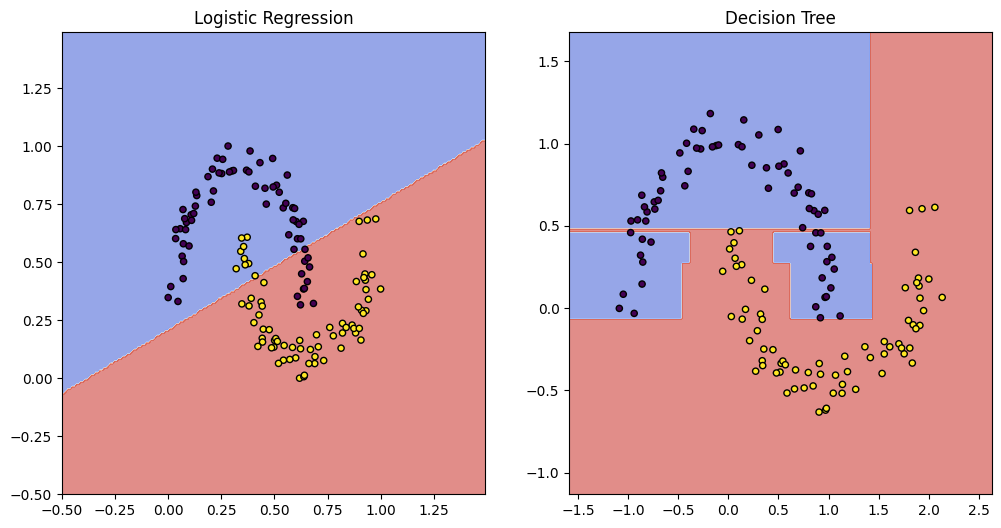

In [358]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_decision_boundary(model_lr, X_train_normalized, y_train, axes[0], "Logistic Regression")

plot_decision_boundary(model_dtc, X_train, y_train, axes[1], title="Decision Tree")

plt.show()

Bonus. Implement one technique to improve one of the models. We implement GridSearch, which will select hyperparameters for our model.

In [359]:
from sklearn.model_selection import GridSearchCV

In [360]:
param_grid = [
    {'C': np.logspace(-4, 4, 10), 'penalty': ['l2'], 'max_iter': [100, 200, 300]},  # Для 'lbfgs', 'newton-cg', 'sag'
    {'C': np.logspace(-4, 4, 10), 'penalty': ['l1'], 'max_iter': [100, 200, 300], 'solver': ['liblinear']},  # Для 'liblinear'
    {'C': np.logspace(-4, 4, 10), 'penalty': ['elasticnet'], 'l1_ratio': [0.5], 'max_iter': [100, 200, 300], 'solver': ['saga']}  # Для 'saga'
]

In [361]:
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_normalized, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

Best parameters: {'C': 0.3593813663804626, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Best accuracy: 0.8714285714285713


In [362]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_normalized, y_test)
print(f"Accuracy of the best model: {test_accuracy}")

Accuracy of the best model: 0.8833333333333333


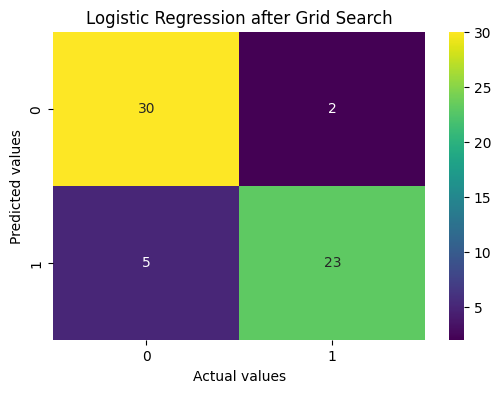

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.92      0.82      0.87        28

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [363]:
display_metrics(best_model, X_test_normalized, y_test, title="Logistic Regression after Grid Search")

After selecting the hyperparameters, nothing has changed in reality. The model performs with the same result.

Problem 1. Train logistic regression model on the wine classification dataset. 
- First, split the dataset into train and test. What is the accuracy of the obtained model? Confusion matrix?

In [364]:
from sklearn.datasets import load_wine
data = load_wine()

In [365]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [366]:
X1, y1 = data["data"], data["target"]

In [367]:
X1, y1

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [368]:
model_LR = LogisticRegression()

In [369]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [370]:
X_train_normalized1 = scaler.fit_transform(X_train1)
X_test_normalized1 = scaler.transform(X_test1)

In [371]:
X_train_normalized1

array([[0.25197349, 0.88148083],
       [0.64284125, 0.50380342],
       [0.63634083, 0.67569825],
       [0.81385047, 0.1293311 ],
       [0.34161096, 0.54639855],
       [0.52279878, 0.8009887 ],
       [0.45570503, 0.81825025],
       [0.10813348, 0.7040179 ],
       [0.58671621, 0.73434676],
       [0.65521812, 0.41599974],
       [0.86579186, 0.22878777],
       [0.61858965, 0.        ],
       [0.77748019, 0.1825306 ],
       [0.97725392, 0.68585082],
       [0.73210601, 0.07618139],
       [0.61925763, 0.16277011],
       [0.08593264, 0.67053668],
       [0.50098957, 0.16334549],
       [0.63716581, 0.3842497 ],
       [0.68388603, 0.32199965],
       [0.5415862 , 0.73361844],
       [0.54261137, 0.07754644],
       [0.55379032, 0.75332252],
       [0.45061739, 0.41177424],
       [0.89895331, 0.67552841],
       [0.07130204, 0.57904053],
       [0.4977315 , 0.13404765],
       [0.5064443 , 0.1709633 ],
       [0.44749511, 0.21107995],
       [0.07048007, 0.42887272],
       [0.

In [372]:
model_LR.fit(X_train_normalized1, y_train1)

LogisticRegression()

In [373]:
model_LR.score(X_test_normalized1, y_test1)
print(f"Accuracy of the model = {accuracy}")

Accuracy of the model = 0.8833333333333333


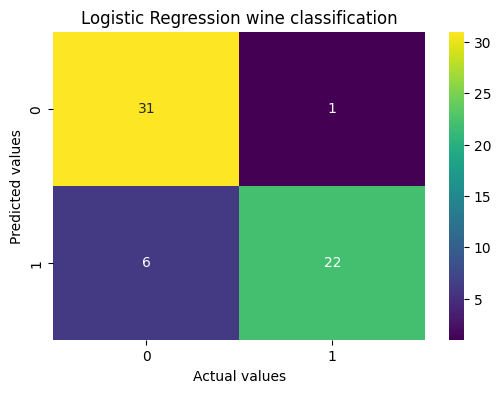

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [374]:
display_metrics(model_LR, X_test_normalized1, y_test1, title="Logistic Regression wine classification")

Problem 2 (theoretical). Don't chatgpt, use your own brain and wording, thank you. You can google if you need to, though.
- Imagine we are dealing with a binary classification task and we have a class distribution of 90%/10%, meaning a very unbalanced set of samples. 
    - Out of all the metrics we learned, what do you think the best classification metric for this task would be? Precision-recall? Accuracy? F1-score? ROC AUC? Something else?
    - Share your thoughts on the topic, and express yourself on the *accuracy* metric here. Would it be beneficial, not at all?

- It is depend on what we want to predict. If it Class labels then G-mean will suit us if both classes are equally important, and if positive class is more important, then we take F1-score. If it is probalities and you need class labels then ROC AUC (in case if both classes are equally important) 
and PR AUC (in case if positive class are more important).

- Accuracy will not be a good metric in this case. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts 
the majority class.